# Patrick Callahan
## Student ID#: 00001473244

### Q1) Perform Normalization on the California Housing Dataset.

It is a sklearn dataset. You can find more details here: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html
- 1) Load this dataset into your python file. (Hint: You may want to convert it to a pandas dataset)
- 2) Normalize all the columns in the dataset using the Normalize() and Zscore() functions discussed in class. (Note: normalize() only normalizes values along rows. You need to convert the column into an array before you apply the method)

In [50]:
from sklearn import datasets
from sklearn import preprocessing
import numpy as np
import pandas as pd
import scipy.stats as stats

df = datasets.fetch_california_housing(data_home=None, download_if_missing=True, return_X_y=False, as_frame=False)
dataFrame = pd.DataFrame(data = df.data, columns=df.feature_names)

#Normalize using the .normalize() function
def normalizeDataFunction(data_frame_input): 
    for i in data_frame_input: 
        tempArray = np.asarray(data_frame_input[i])
        tempArray = tempArray.reshape(1,-1)
        print(tempArray)
        normalized = preprocessing.normalize(tempArray)
        print(scaled)
        print()
    
#Normalize using the z-scaler function
def zScoreFunction(data_frame_input_z):
    print(data_frame_input_z.apply(stats.zscore))
     
print("Normalized dataset with .normalize function: ")
normalizeDataFunction(dataFrame)
print()
print("Normalized dataset with zscore function: ")
zScoreFunction(dataFrame)

Normalized dataset with .normalize function: 
[[8.3252 8.3014 7.2574 ... 1.7    1.8672 2.3886]]
[[0. 0. 0. ... 0. 0. 0.]]

[[41. 21. 52. ... 17. 18. 16.]]
[[0. 0. 0. ... 0. 0. 0.]]

[[6.98412698 6.23813708 8.28813559 ... 5.20554273 5.32951289 5.25471698]]
[[0. 0. 0. ... 0. 0. 0.]]

[[1.02380952 0.97188049 1.07344633 ... 1.12009238 1.17191977 1.16226415]]
[[0. 0. 0. ... 0. 0. 0.]]

[[ 322. 2401.  496. ... 1007.  741. 1387.]]
[[0. 0. 0. ... 0. 0. 0.]]

[[2.55555556 2.10984183 2.80225989 ... 2.3256351  2.12320917 2.61698113]]
[[0. 0. 0. ... 0. 0. 0.]]

[[37.88 37.86 37.85 ... 39.43 39.43 39.37]]
[[0. 0. 0. ... 0. 0. 0.]]

[[-122.23 -122.22 -122.24 ... -121.22 -121.32 -121.24]]
[[0. 0. 0. ... 0. 0. 0.]]


Normalized dataset with zscore function: 
         MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
0      2.344766  0.982143  0.628559  -0.153758   -0.974429 -0.049597   
1      2.332238 -0.607019  0.327041  -0.263336    0.861439 -0.092512   
2      1.782699  1.856182  1.15

### Q2) Perform Correlation Analysis on the sklearn Boston dataset

(the dataset in the example shown in class) and the Movie Dataset (https://www.kaggle.com/ruchi798/movies-on-netflix-prime-video-hulu-and-disney). Submit the python file along with a document answering the following questions for each of the datasets.
- What are the names of the features?
- Which features were highly correlated to each other? Was it positive or negative?
- Which features were highly correlated to the target(response) variable?
- If features A and B are highly correlated to each other, were they highly correlated to the target(response) variable? State examples from your result to support your answer.

In [196]:
from sklearn.datasets import load_boston
#import sklearn as sk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#structuring the boston dataset in a way that we can use it to do the correlation analysis. 
boston = load_boston()
boston_dataFrame = pd.DataFrame(data = boston.data, columns=boston.feature_names)
boston_dataFrame['Price']=boston.target
X=boston_dataFrame.drop("Price",1)
y=boston_dataFrame['Price']


#Restructuring movies in a way where the necessary columns can be able to be recognized 
movies = pd.read_csv("movies.csv", index_col= 0)
movies['Age'] = movies['Age'].str.replace('+', '')
movies['Age'] = movies['Age'].str.replace('all', '0')
movies["Rotten Tomatoes"]= movies['Rotten Tomatoes'].str.replace('/100', '')
columns_type = {'Age': float,'Rotten Tomatoes': float}
movies = movies.astype(columns_type)

movies = movies.drop('Type', 1)
print(boston.feature_names)
print()
print(movies.columns)




['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']

Index(['ID', 'Title', 'Year', 'Age', 'Rotten Tomatoes', 'Netflix', 'Hulu',
       'Prime Video', 'Disney+'],
      dtype='object')


<AxesSubplot:>

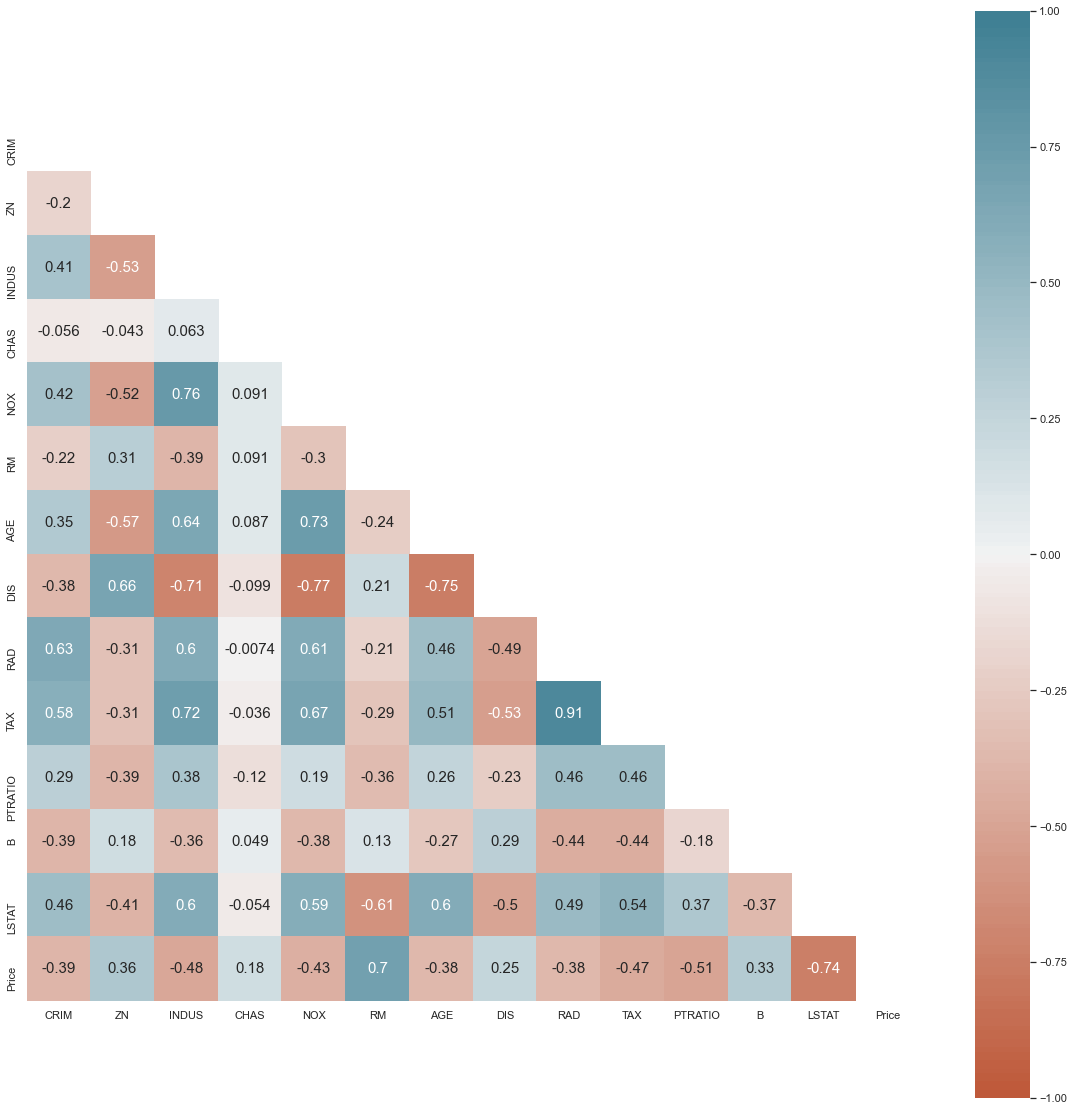

In [200]:
sns.set_theme(style="white")

boston_correlation = boston_dataFrame.corr()
mask = np.triu(np.ones_like(boston_correlation, dtype=bool))




plt.subplots(figsize=(20,20))
sns.heatmap(
    boston_correlation,
    
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(22, 220, n=150),
    
    annot=True, annot_kws={'size': 15},
    mask = mask,
    square=True
    
)

<AxesSubplot:>

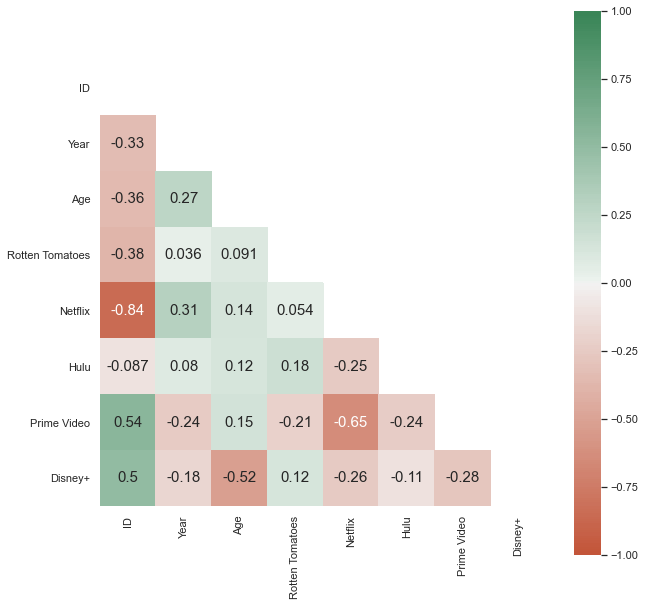

In [201]:
sns.set_theme(style="white")


movies_correlation = movies.corr()
mask = np.triu(np.ones_like(movies_correlation, dtype=bool))


plt.subplots(figsize=(10,10))
sns.heatmap(
    movies_correlation,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 500, n=200),
    annot=True, annot_kws={'size': 15},
    mask = mask,
    square=True
    
)